# p-Median

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#p-Median" data-toc-modified-id="p-Median-1.1">p Median</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Case1.-Solving-p-Median-problem-with-synthetic-data-3.1">Case1. Solving p-Median problem with synthetic data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Case2. Solving p-Median problem with real-world data</a></span></li></ul></li></ul></div>

## Problem Description

### p-Median Problems <sup>[1]</sup>

The p-median is a location assignment model that locates a given number of facilities $p$ and assigns demand node $i$ to facility $j$ in order to **minimize the total distance from the demand points to the facility**. In other words, we want to choose $p$ facilities from potential facility locations as median to minimize the total distance between the demand nodes and the location where the facility is placed, and each demand point should be assigned to their nearest medians. 


*Parameters*:
* **$I$** : Collection of demand point locations
* **$h_i$** : Number of customers at point $i$
* **$P$** : Total number of facilities
* **$d_{ij}$** : Distance between point $i$ and point $j$

*Decision variables*:
$$
X_i= \begin{cases}1, & \text { Build facilities at point } i \\ 0, & \text { else }\end{cases}\\
Y_{i j}= \begin{cases}1, & \text { Assign point } i \text { to point } j  \\ 0, & \text { else }\end{cases}
$$

###  Integer programming model:
\begin{array}{lll}
\min & \sum_{i, j \in I} h_i d_{i j} Y_{i j} & (1)\\
\text { s.t. } & \sum_{i \in I} X_i=P, & (2)\\
& Y_{i j} \leq X_j,  \forall i, j \in I, & (3) \\
& \sum_{j \in I} Y_{i j}=1,  \forall i \in I, & (4)\\
& X_i, Y_{i j} \in\{0,1\}, \forall i, j \in I.  & (5)
\end{array}

The objective function (1) requires the minimum total distance between the demand point and the candidate facility. Constraint (2) indicates that only $p$ candidate facilities can be selected.Constraint (3) indicates that demand points are only allowed to be assigned to locations with facilities. Constraint (4) ensures that each demand point $i$ can only be served by one candidate facility point $j$.
     
[1] Hakimi S L. Optimum locations of switching centers and the absolute centers and medians of a graph[J]. Operations research, 1964, 12(3): 450-459.

## Setup

### Set up the environment by importing libraries
import numpy, pulp, matplotlib, pandas and Hispot libraries to set up an environment

In [17]:
import random
import numpy as np
from pulp import *
import matplotlib.pyplot as plt
from hispot.FLP import PMedian

PuLP is an open source linear programming package (actually also includes integer programming). You can use `pip install pulp` to start. 

PuLP supports many open-source linear programming solvers, such as `CBC` and `GLPK`. In addition, PuLP also supports commercial solvers such as `Gurobi` and IBM's `CPLEX`. Notice: these commercial solvers might need licenses to deal with the large-scale problem.  
The default solver after installing PuLP is CBC. This open-source solver from COIN-OR is sufficient for solving most problems.
You can use `listSolvers(onlyAvailable=True)` to check the other available solvers.

In [18]:
np.random.seed(0) # random seed
solver_list = listSolvers(onlyAvailable=True)
print(solver_list) 

Restricted license - for non-production use only - expires 2026-11-23


['GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD', 'COIN_CMD']


## Examples

In this part, we will input synthetic data and real-world data and display them as two examples to represent random cases and real-world scenarios, respectively.

### Case1. Solving p-Median problem with synthetic data

Generate problem with synthetic data

In [19]:
num_points = 50
num_located = 8  # P: number of located facility in the end
np.random.seed(0)
points = [(random.random(), random.random()) for i in range(num_points)]
points_np = np.array(points)

Output optimal solution

In [20]:
%%time
centers, assigns, obj = PMedian(num_points=num_points,
                                points=points_np,
                                solver=PULP_CBC_CMD(),
                                num_located=num_located).prob_solve()

Status: Optimal
Centers = [18, 19, 21, 26, 29, 34, 45, 48]
Assigned relationships =  {18: [22, 31, 33, 49], 19: [4, 9, 11, 13, 24, 27, 36, 37, 40, 42, 43, 44], 21: [20, 23], 26: [3, 14, 17, 30, 41], 29: [0, 15, 32, 35], 34: [6, 10, 16, 28, 46], 45: [1, 5, 12, 38, 39], 48: [2, 7, 8, 25, 47]}
Minimum total distance =  5.740888696847359
CPU times: total: 46.9 ms
Wall time: 255 ms


Visualize optimal solution

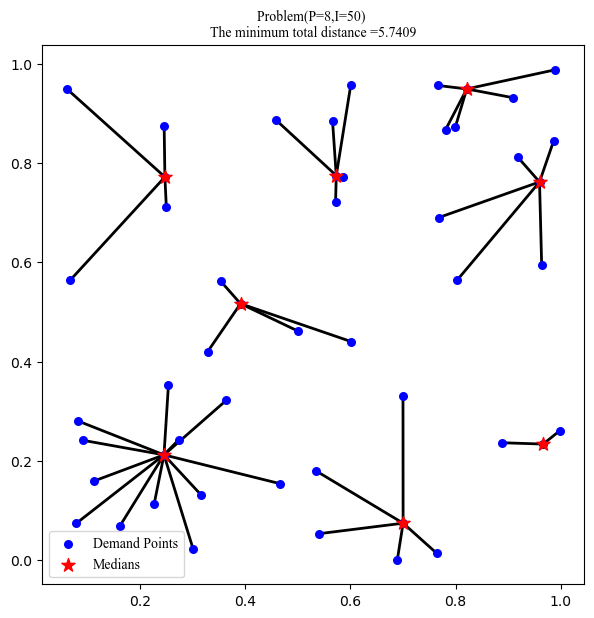

In [21]:
plt.figure(figsize=(7,7))
name = 'Problem(P=' + str(num_located) + ',I=' + str(num_points) + ') \nThe minimum total distance =' + str(round(obj,4))
plt.title(name, fontsize = 15,font = 'Times New Roman')

#Points
plt.scatter(*zip(*points_np), c='Blue', marker='o',s=30, label = 'Demand Points', zorder=2)
plt.scatter(*zip(*points_np[centers]), c='Red', marker='*',s=100,label = 'Medians',zorder=3)
#Lines
for i in assigns:
    center_point = points_np[i]
    for j in assigns[i]:
        demand_points = points_np[j]
        pts = [points[i], points[j]]
        plt.plot(*zip(*pts), c='Black', linewidth=2, zorder=1)
# plt.grid(True)   
plt.legend(loc='best',prop='Times New Roman',fontsize=12)
plt.show()

### Case2. Solving p-Median problem with real-world data

import `geopandas`, `geoplot` to plot the real world map.

In [22]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from math import *
from matplotlib.collections import LineCollection

We select Changping District of Beijing the study area and read partial poi points in Xicheng District.

In [23]:
%%time
region=gpd.read_file("../data/suzhou/姑苏区.shp")
region.head(2)

CPU times: total: 0 ns
Wall time: 4.77 ms


,SmUserID,地名,区划码,县级,县级码,县级类,地级,地级码,地级类,省级,...,NAME_2,VAR_NAME2,GID_2,TYPE_2,NAME_1,VAR_NAME1,GID_1,TYPE_1,year,geometry
0,0,姑苏区,320508,姑苏区,320508,市辖区,苏州市,320500,地级市,江苏省,...,Suzhou,Sū Zhōu,320500,Prefecture City,Jiangsu,Jiāng Sū,320000,Province,2023,"POLYGON ((120.6351 31.33819, 120.63561 31.3362..."


Partial POI data in Changping district

In [24]:
%%time
poi = gpd.read_file("../data/suzhou/姑苏区_物流快递.shp")


CPU times: total: 0 ns
Wall time: 7.15 ms


In [25]:
def render_north_arrow(ax, x, y, size, ratio = 1):
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

Visualization of the input data by geoplot

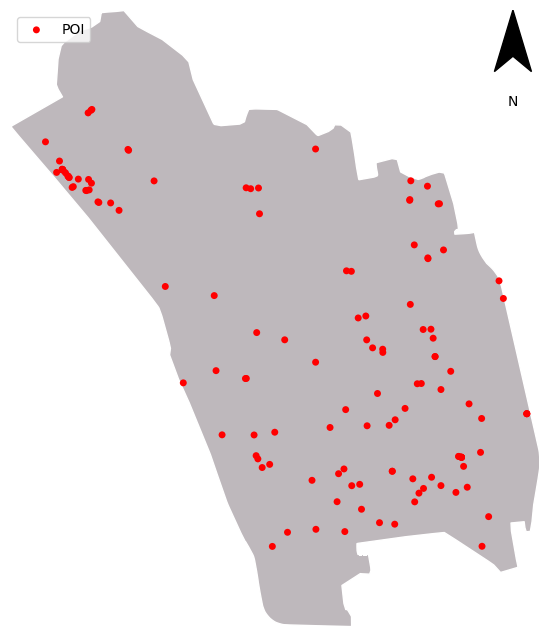

In [26]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="#BEB8BC",
                   figsize=(10, 8))
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='red',
               alpha=1,
               linewidth=0,
               label='POI',
               ax=ax)
plt.legend(loc='upper left')
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.05,ratio = 0.7)

Generate problem with real-world data

In [27]:
def get_coordinate(longitude, latitude):
    # lo is the longitude of the location;
    # la is the latitude of the location;

    # coordinate transformation
    R = 6537
    lo = np.mean(longitude)
    la = np.mean(latitude)
    x = R*(longitude-lo)*cos(la)
    y = R*(latitude-la)
    return x,y

In [28]:
data = poi[['POINT_X', 'POINT_Y']]
num_points = poi.shape[0]
num_located = 25
x,y=get_coordinate(data['POINT_X'], data['POINT_Y'])
pointsxy = [(x[i], y[i]) for i in range(num_points)] # x,y
pointsxy_np = np.array(pointsxy)
points = [(data['POINT_X'][i],data['POINT_Y'][i]) for i in range(num_points)] 
points_np = np.array(points)

Output optimal solution

In [29]:
centers, assigns, obj = PMedian(num_points=num_points,
                                points=pointsxy_np,
                                solver=PULP_CBC_CMD(),
                                num_located=num_located).prob_solve()

Status: Optimal
Centers = [10, 20, 25, 34, 35, 39, 41, 42, 51, 52, 53, 56, 59, 63, 64, 66, 69, 75, 76, 104, 109, 112, 116, 121, 125]
Assigned relationships =  {10: [7, 8, 9, 11, 12, 13, 17, 60, 62, 78, 80], 20: [21, 22], 25: [127], 34: [36, 37], 35: [4, 32, 33, 47, 48, 71, 81], 39: [16], 41: [45], 42: [], 51: [101, 102], 52: [43, 57, 77, 95, 96, 97, 98, 99, 100, 103], 53: [26, 30, 38, 105, 106], 56: [73, 87], 59: [15, 54, 58, 108, 119, 122], 63: [18, 28, 29, 50, 61], 64: [14, 19, 27, 123], 66: [5, 74, 107], 69: [40, 44, 46, 55, 70, 72, 88, 89, 90, 91, 92, 93, 94, 128], 75: [67], 76: [1, 2, 49, 83, 84, 85], 104: [3, 6], 109: [0, 31, 82, 114, 115], 112: [110, 111, 113], 116: [23, 24, 65, 117, 118], 121: [68, 79, 120], 125: [86, 124, 126]}
Minimum total distance =  2649.0553750789654


prepare the LineString and center Points to plot the solution

In [30]:
from shapely.geometry import LineString
crs = 'EPSG:4326'
lines = gpd.GeoDataFrame(columns=['id', 'geometry'], crs=crs)
k = 0
for i in assigns:
    center = points_np[i]
    for j in assigns[i]:
        assign = points_np[j]
        line = LineString([center, assign])
        lines.loc[k] = [k+1, line]
        k = k+1
center_points = poi.iloc[centers]

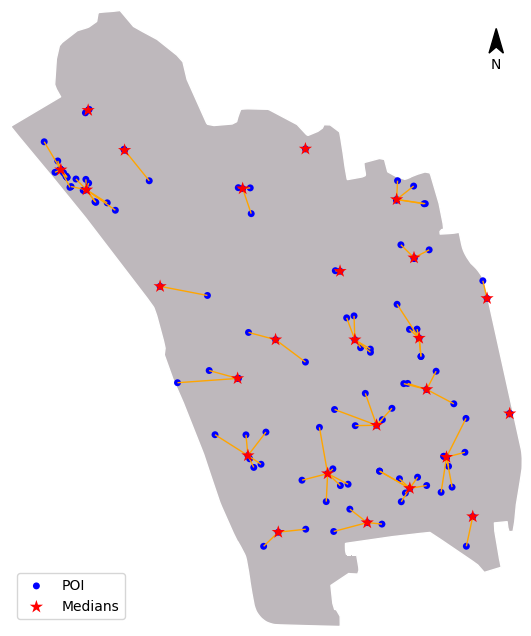

In [31]:
ax = gplt.sankey(lines, 
                 projection=gcrs.Mollweide(),
                 linewidth=1,
                 color='orange',
                 zorder=3,
                 figsize=(10, 8),)
gplt.polyplot(region,
              projection=gcrs.AlbersEqualArea(),
              edgecolor="white", 
              facecolor="#BEB8BC",
              zorder=1,
              ax=ax,)
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='blue',
               alpha=1,
               linewidth=0,
               label='POI',
               zorder=2,
               ax=ax)
gplt.pointplot(center_points, 
               extent=region.total_bounds,
               s=10,
               color='red',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Medians',
               zorder=4,
               ax=ax)
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)
plt.legend(loc='lower left')

In [32]:
import math

def render_scale_bar(ax, x=0.05, y=0.05, length_frac=0.25, segments=2,
                     color='black', unit='m', fontsize=9, approx_lat=None, 
                     fixed_max_distance=4000):
    # 计算实际比例尺长度（根据地图坐标系）
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    
    # 计算每度对应的米数（如果是经纬度坐标）
    if approx_lat is not None:
        m_per_deg = 111320.0 * math.cos(math.radians(approx_lat))
        map_width_m = (x1 - x0) * m_per_deg
    else:
        # 假设是投影坐标系，直接使用坐标差值
        map_width_m = x1 - x0
    
    # 根据固定距离计算比例尺应该占的比例
    actual_length_frac = fixed_max_distance / map_width_m
    # 限制比例尺不要太长，最多占图幅的30%
    actual_length_frac = min(actual_length_frac, 0.3)
    
    # 画主线（使用计算出的实际长度比例）
    ax.plot([x, x+actual_length_frac], [y, y], transform=ax.transAxes, color=color, lw=2)

    # 使用固定的最大距离值
    total_len_m = fixed_max_distance

    # 刻度与数字
    for s in range(segments + 1):
        xs = x + actual_length_frac * s / segments
        ax.plot([xs, xs], [y-0.01, y+0.01], transform=ax.transAxes, color=color, lw=1)
        val = total_len_m * s / segments
        label = '0' if s == 0 else f'{int(val):,}'
        ax.text(xs, y-0.035, label, ha='center', va='top', transform=ax.transAxes, fontsize=fontsize)

    # 单位（放在比例尺右端，增加间距避免重合）
    ax.text(x + actual_length_frac + 0.02, y-0.035, unit, ha='left', va='top',
            transform=ax.transAxes, fontsize=fontsize)

In [33]:
# 绘制指北针
def render_north_arrow(ax, x, y, size, ratio = 1):
    # ax： matplotlib的坐标轴对象 绘制指北针
    # x, y： 指北针的左下角坐标
    # size： 指北针的大小
    # ratio： 指北针的比例 默认为1
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2.5, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=22, fontweight='bold')

In [34]:
import os
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib import patheffects as pe

def plot_result_pretty(ls, opt_sites, radius_m=2000, roads_path="data/HuLaTang/Export_Output_2.shp",
                       demand_gridsize=60, demand_cmap="magma", roads_color="#9e9e9e", roads_alpha=0.35,
                       norm_mode="log", vmin_q=0.10, vmax_q=0.995, gamma=0.6, reduce="sum",
                       overlay_points=True, overlay_points_size=6, overlay_points_alpha=0.28,
                       overlay_hex_grid=False, hex_grid_color="#222222", hex_grid_alpha=0.18, hex_grid_lw=0.25,
                       circle_style="ring", show_heat=True, show_colorbar=False, lang="zh", title=None):
    """
    更美观的选址结果绘图：需求热度（hexbin）+ 道路 + 站点 + 服务圈。

    Args:
        ls (GeoDataFrame): 需求点，包含 POINT_X/POINT_Y 或 X/Y 以及 All_pop（可选）。
        opt_sites (DataFrame): 入选站点行，包含 x/y 列（point_x_1/POINT_X...）。
        radius_m (float): 服务半径（与坐标同单位）。
        roads_path (str): 道路 shp 文件路径。
        demand_gridsize (int): 六边形网格大小。
        demand_cmap (str): 需求热度配色。
        roads_color (str): 道路颜色。
        roads_alpha (float): 道路透明度。
        norm_mode (str): 'log' | 'power' | 'linear'。
        vmin_q, vmax_q (float): 需求分位裁剪，仅用于显示。
        gamma (float): PowerNorm 的 gamma。
        reduce (str): 'sum' 或 'mean' 作为 hexbin 聚合方式。
        overlay_points (bool): 是否叠加需求点散点。
        circle_style (str): 'fill' | 'ring' 服务圈样式。
        show_colorbar (bool): 是否显示色标。
        lang (str): 'zh' 或 'en'，控制标签语言。
        title (str|None): 自定义标题。
    """
    # 语言包
    L = {
        'zh': {
            'road': '道路网络', 'demand': '需求点', 'selected': '新建门店', 'current': '现有门店',
            'title': '选址结果与需求强度', 'subtitle': lambda n, r: f"门店数：{n}  半径：{r} m"
        },
        'en': {
            'road': 'Road network', 'demand': 'Demand points', 'selected': 'Selected Medians', 'current': 'Current sites',
            'title': 'Optimized Facilities with Demand Heat', 'subtitle': lambda n, r: f"Facilities: {n}  Radius: {r} m"
        }
    }
    LL = L.get(lang, L['zh'])

    # 1) 需求列与坐标列
    pop_col = None
    if 'speed_pct_freeflow_rev' in ls.columns:
        pop_col = 'speed_pct_freeflow_rev'
    else:
        for c in ls.columns:
            if str(c).lower() == 'all_pop':
                pop_col = c
                break

    # 支持多种坐标列命名：X/Y、POINT_X/POINT_Y、x/y、lon/lat、lng/latitude 等
    def pick_xy_from_ls(df):
        lower_to_orig = {str(c).lower(): c for c in df.columns}
        def choose(candidates):
            for name in candidates:
                if name in lower_to_orig:
                    return lower_to_orig[name]
            return None
        x_col = choose(['x', 'point_x', 'pointx', 'lon', 'lng', 'longitude', 'point_x_1', 'point_x'])
        y_col = choose(['y', 'point_y', 'pointy', 'lat', 'latitude', 'point_y_1', 'point_y'])
        if x_col is None and 'POINT_X' in df.columns:
            x_col = 'POINT_X'
        if y_col is None and 'POINT_Y' in df.columns:
            y_col = 'POINT_Y'
        if x_col is None and 'X' in df.columns:
            x_col = 'X'
        if y_col is None and 'Y' in df.columns:
            y_col = 'Y'
        if x_col is None or y_col is None:
            raise ValueError("ls must contain coordinate columns (X/Y, POINT_X/POINT_Y, or lon/lat).")
        return x_col, y_col

    dx, dy = pick_xy_from_ls(ls)

    # 2) 站点坐标列
    def pick_xy_cols(df):
        x_col = None
        y_col = None
        # 支持更多坐标命名：x/y、X/Y、POINT_X/POINT_Y、lon/lat、lng/latitude
        lower_to_orig = {str(c).lower(): c for c in df.columns}
        def choose(candidates):
            for name in candidates:
                if name in lower_to_orig:
                    return lower_to_orig[name]
            return None
        x_col = choose(['x', 'point_x', 'pointx', 'lon', 'lng', 'longitude', 'point_x_1', 'point_x'])
        y_col = choose(['y', 'point_y', 'pointy', 'lat', 'latitude', 'point_y_1', 'point_y'])
        if x_col is None and 'POINT_X' in df.columns: x_col = 'POINT_X'
        if y_col is None and 'POINT_Y' in df.columns: y_col = 'POINT_Y'
        if x_col is None and 'X' in df.columns: x_col = 'X'
        if y_col is None and 'Y' in df.columns: y_col = 'Y'
        if x_col is None or y_col is None:
            raise ValueError('opt_sites must contain coordinate columns (X/Y, POINT_X/POINT_Y, or lon/lat).')
        return x_col, y_col

    x_col, y_col = pick_xy_cols(opt_sites)

    # 3) 画布
    fig, ax = plt.subplots(figsize=(20, 16))

    # 4) 道路底图
    if isinstance(roads_path, str) and os.path.exists(roads_path):
        try:
            roads = gpd.read_file(roads_path)
            try:
                roads.plot(ax=ax, color=roads_color, linewidth=0.4, alpha=roads_alpha, zorder=1, label=LL['road'])
            except Exception:
                pass
        except Exception:
            pass

    # 5) 需求热度（hexbin），分位裁剪 + 归一
    try:
        if show_heat:
            values = ls[pop_col].to_numpy() if pop_col is not None else None
            if values is not None:
                vmin = float(np.quantile(values, vmin_q)) if 0 <= vmin_q < 1 else None
                vmax = float(np.quantile(values, vmax_q)) if 0 < vmax_q <= 1 else None
                if vmin is not None and vmax is not None and vmax > vmin:
                    values_clipped = np.clip(values, vmin, vmax)
                else:
                    values_clipped = values
                if norm_mode == 'log':
                    from matplotlib.colors import LogNorm
                    norm = LogNorm(vmin=max(values_clipped.min(), 1e-6), vmax=values_clipped.max())
                elif norm_mode == 'power':
                    from matplotlib.colors import PowerNorm
                    norm = PowerNorm(gamma=gamma, vmin=values_clipped.min(), vmax=values_clipped.max())
                else:
                    norm = None
            else:
                values_clipped = None
                norm = None

            reducer = np.sum if reduce == 'sum' else np.mean
            hb = ax.hexbin(ls[dx].to_numpy(), ls[dy].to_numpy(),
                           C=values_clipped,
                           reduce_C_function=reducer if values_clipped is not None else None,
                           gridsize=demand_gridsize, cmap=demand_cmap, bins=None, mincnt=1,
                           linewidths=0, alpha=0.92, zorder=5, norm=norm)
            try:
                hb.set_edgecolor('face')
            except Exception:
                pass
            if show_colorbar and values is not None:
                cbar = fig.colorbar(hb, ax=ax, shrink=0.8)
                cbar.ax.tick_params(labelsize=10)
    except Exception:
        if show_heat:
            sc = ax.scatter(ls[dx], ls[dy], c=ls[pop_col] if pop_col is not None else '#9ecae1',
                            s=8, cmap=demand_cmap, edgecolors='none', zorder=5)
            if show_colorbar and pop_col is not None:
                fig.colorbar(sc, ax=ax, shrink=0.8)

    # 6) 可选叠加：需求点
    if overlay_points:
        try:
            ax.scatter(ls[dx], ls[dy], s=overlay_points_size, c='#2c3e50', alpha=overlay_points_alpha,
                       linewidths=0, zorder=6, label=LL['demand'])
        except Exception:
            pass

    # 7) 门店与服务圈
    legend_flag = {'selected': False, 'current': False}
    for _, row in opt_sites.iterrows():
        cx = float(row[x_col])
        cy = float(row[y_col])
        is_current = ('current' in opt_sites.columns and bool(row['current']) is True)
        if is_current:
            coll = ax.scatter(cx, cy, s=46, marker='o', facecolor='white', edgecolor='red', linewidths=1.2,
                              zorder=10, label=LL['current'] if not legend_flag['current'] else None)
            try:
                coll.set_path_effects([pe.withStroke(linewidth=2.2, foreground='white')])
            except Exception:
                pass
            legend_flag['current'] = True
            circ_kwargs = dict(facecolor='none', edgecolor='red', lw=1.0, alpha=0.9, zorder=9)
            if circle_style == 'fill':
                circ_kwargs.update(facecolor='none')
            ax.add_artist(plt.Circle((cx, cy), radius_m, **circ_kwargs))
        else:
            coll = ax.scatter(cx, cy, s=52, marker='o', facecolor='#FF8C42', edgecolor='white', linewidths=0.8,
                              zorder=11, label=LL['selected'] if not legend_flag['selected'] else None)
            try:
                coll.set_path_effects([pe.withStroke(linewidth=2.0, foreground='white')])
            except Exception:
                pass
            legend_flag['selected'] = True
            if circle_style == 'fill':
                circ = plt.Circle((cx, cy), radius_m, facecolor='#FF8C42', edgecolor='#FF8C42', lw=0.6, alpha=0.12, zorder=8)
            else:
                circ = plt.Circle((cx, cy), radius_m, facecolor='none', edgecolor='#FF8C42', lw=1.2, ls='--', alpha=0.85, zorder=9)
            ax.add_artist(circ)

    # 8) 外观
    ax.axis('scaled')
    ax.tick_params(axis='both', left=False, top=False, right=False,
                   bottom=False, labelleft=False, labeltop=False,
                   labelright=False, labelbottom=False)
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.0)
        spine.set_edgecolor('#333333')
    ax.margins(x=0.02, y=0.02)

    ttl = title if title is not None else LL['title']
    ax.set_title(ttl + "\n" + LL['subtitle'](len(opt_sites), int(radius_m)), fontsize=18, pad=12)
    try:
        #render_scale_bar(ax=ax, x=0.05, y=0.05)
        #render_scale_bar(ax, x=0.05, y=0.15, length_frac=0.25, segments=2,
                 #color='black', unit='m', fontsize=9, approx_lat=approx_lat, 
                 #fixed_max_distance=4000)
        render_north_arrow(ax=ax, x=0.95, y=0.95, size=0.03, ratio=0.7)
    except Exception:
        pass

    # 9) 图例（统一“Selected facilities / Demand points”大小）
    legend_marker_size = 22         # 放大图例里圆点
    legend_fontsize = 14            # 放大字体
    legend_frame_lw = 2.0           # 框线粗细 
    legend_frame_ec = '#333333'     # 框线颜色
    legend_borderpad = 0.9          # 框与内容的内边距
    legend_labelspacing = 0.8       # 行距
    legend_handlelength = 1.6       # 句柄长度
    legend_handletextpad = 0.8      # 句柄与文字间距
    has_current = ('current' in opt_sites.columns and bool(np.any(opt_sites['current'].astype(bool))))
    custom_handles = []
    # road
    #custom_handles.append(Line2D([0], [0], color=roads_color, lw=1.0, alpha=0.6, label=LL['road']))
    # current (optional)
    if has_current:
        custom_handles.append(Line2D([0], [0], marker='o', color='none', markerfacecolor='white',
                                    markeredgecolor='red', markeredgewidth=1.2, markersize=legend_marker_size,
                                     label=LL['current']))
    # demand
    if overlay_points:
        custom_handles.append(Line2D([0], [0], marker='o', color='none', markerfacecolor='#2c3e50',
                                     markersize=legend_marker_size, alpha=overlay_points_alpha, label=LL['demand']))
    # selected
    if len(opt_sites) > 0:
        custom_handles.append(Line2D([0], [0], marker='o', color='none', markerfacecolor='#FF8C42',
                                     markeredgecolor='white', markeredgewidth=0.8, markersize=legend_marker_size,
                                     label=LL['selected']))
    leg = ax.legend(handles=custom_handles, loc='lower left', markerscale=1.0, frameon=True, framealpha=0.85, fontsize=20)

    # 强化框线 
    leg.get_frame().set_linewidth(legend_frame_lw)
    leg.get_frame().set_edgecolor(legend_frame_ec)
    fig.tight_layout()
    return ax


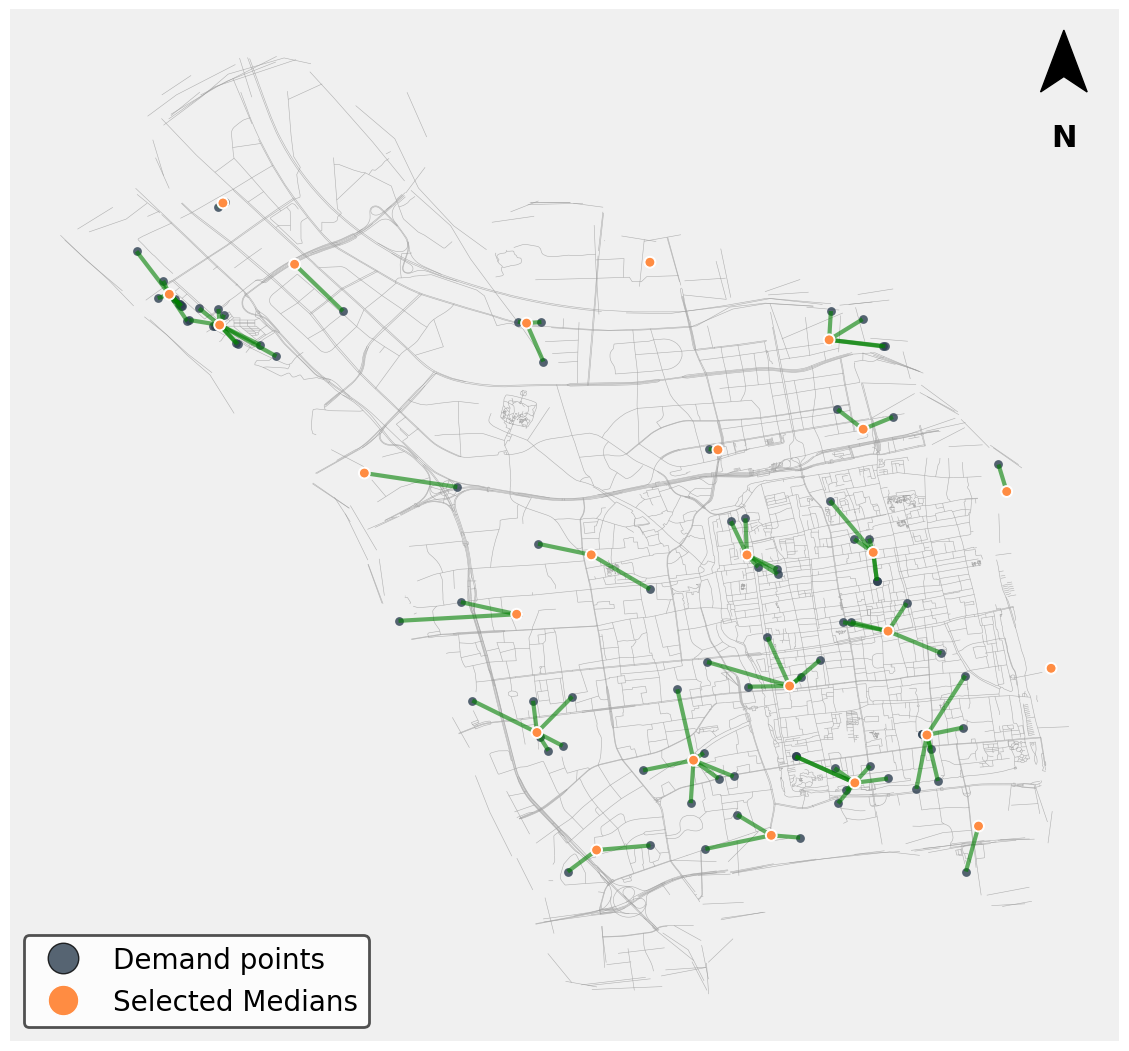

In [36]:
# Demo call for pretty plot (Gurobi)
#try:
#    opt_sites = cand_df.loc[selected_sites]
#except Exception:
#    opt_sites = cand_df.iloc[:30]
ls = poi[['POINT_X','POINT_Y']].copy()

# 估计中心纬度用于换算（经纬度数据时）
approx_lat = float(ls['POINT_X'].mean()) if 'POINT_Y' in ls.columns else float(ls['Y'].mean())

ax = plot_result_pretty(
    #ls_hlt,
    ls,
    center_points,
    radius_m=550,
    roads_path="D:\Academic\Task123_HiSpot\hispot-main\data\suzhou\\\姑苏区_路网.shp",
    demand_gridsize=80,
    demand_cmap="inferno",
    roads_color="#9e9e9e", roads_alpha=0.8,
    overlay_points_size=40, overlay_points_alpha=0.8,
    norm_mode="log",
    vmin_q=0.12,
    vmax_q=0.995,
    reduce="sum",
    circle_style="ring",
    show_heat=False,
    #show_heat=True,
    lang="en",
    title="pMedian-Optimized Facilities"
)
# 16:9 canvas (for PPT) and save HD image
fig = ax.figure
fig.set_size_inches(20, 11.25)
fig.tight_layout()
ax.set_title('')
for s in ax.spines.values(): s.set_visible(False)
ax.set_xticks([]); ax.set_yticks([])
#ax.set_title("pMedian-Optimized Facilities\nMedians: 25", fontsize=18, pad=12)
ax.set_facecolor("#F0F0F0")      # 改坐标区底色
#ax.figure.patch.set_facecolor("#CDAD00")  # 可选：改整张图画布底色


segments = [np.array([points_np[ci], points_np[dj]]) for ci, js in assigns.items() for dj in js]
lc = LineCollection(segments, colors='green', linewidths=3, alpha=0.6, zorder=10)
ax.add_collection(lc)

fig.savefig("pMedian-gusu.png", dpi=300, bbox_inches="tight")
plt.show()


In [37]:
# PMedian 扩展：可选传入 distance_matrix（用于路网最短路距离）
import numpy as np
from pulp import LpProblem, LpMinimize, LpVariable, lpSum
from hispot.FLP.BaseLocate import PModel

class PMedianCustom(PModel):
    def __init__(self, num_points, points, solver, num_located, distance_matrix=None):
        super().__init__(num_points, points, solver, num_located)
        self.distance = distance_matrix  # 若为 None，则回退到欧氏距离
        self.x = None
        self.y = None
        self.name = 'p-median'

    def prob_solve(self):
        # 若未提供矩阵，按欧氏距离计算（与原库一致）
        if self.distance is None:
            self.distance = np.linalg.norm(
                self.points[:, None, :] - self.points[None, :, :], axis=2
            )

        # 距离矩阵校验与不可达处理
        N = self.num_points
        if self.distance.shape != (N, N):
            raise ValueError(f"distance_matrix 形状应为 {(N, N)}，当前为 {self.distance.shape}")
        # 自距离恒为 0，避免噪声
        np.fill_diagonal(self.distance, 0.0)
        is_finite = np.isfinite(self.distance)

        # 构建 p-median 模型：最小化总服务距离
        prob = LpProblem("p-Median_Problem", LpMinimize)
        Zones = list(range(N))
        x = LpVariable.dicts("Select", Zones, cat="Binary")           # 设施是否选址
        y = LpVariable.dicts("Assign", (Zones, Zones), cat="Binary")  # 需求是否分配给设施
        self.x, self.y = x, y

        # 目标：总距离最小化（仅累加可达对）
        prob += lpSum(
            float(self.distance[i, j]) * y[i][j]
            for i in range(N)
            for j in range(N)
            if is_finite[i, j]
        )

        # 选址数量约束
        prob += (lpSum(x[i] for i in range(N)) == self.num_located)

        # 分配与一致性约束
        for i in range(N):
            reachable_js = [j for j in range(N) if is_finite[i, j]]
            if not reachable_js:
                raise ValueError(f"点 {i} 对任何设施都不可达（distance_matrix 第 {i} 行全为 inf/NaN）")
            # 仅在可达设施中完成一次分配
            prob += (lpSum(y[i][j] for j in reachable_js) == 1)
            # 不可达对强制为 0，避免在约束中出现 inf 系数
            for j in range(N):
                if not is_finite[i, j]:
                    prob += (y[i][j] == 0)
            # 分配-选址一致性（仅对可达对设置）
            for j in reachable_js:
                prob += y[i][j] <= x[j]

        return self.show_result(prob)

# 关键：把 Notebook 里的 PMedian 名称指向扩展后的类，原有调用可直接复用
PMedian = PMedianCustom

In [38]:
# 路网 -> 图 -> 距离矩阵与路径生成
# 依赖：geopandas, shapely>=2.0, networkx, momepy(可选)
import geopandas as gpd
import shapely
from shapely.geometry import Point, LineString
import networkx as nx
import numpy as np
from typing import Tuple, Dict, List

# -------- 工具：投影到米制 --------
def to_metric_gdf(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    if gdf.crs is None:
        raise ValueError("路网缺少 CRS，请在 read_clean_roads(..., assumed_crs=...) 指定或给 shapefile 提供 .prj")
    if gdf.empty or gdf.geometry.is_empty.all():
        raise ValueError("路网几何为空，检查数据或清洗流程")
    crs_obj = gdf.crs
    if getattr(crs_obj, "is_geographic", False):
        metric_crs = gdf.estimate_utm_crs()
        return gdf.to_crs(metric_crs)
    else:
        # 已是投影坐标（米），直接返回
        return gdf

# -------- 工具：读取并清洗路网 --------
def read_clean_roads(roads_path: str, assumed_crs=None) -> gpd.GeoDataFrame:
    roads = gpd.read_file(roads_path)
    # 若缺 CRS，允许外部指定
    if roads.crs is None and assumed_crs is not None:
        roads = roads.set_crs(assumed_crs)
    # 只保留 LineString/MultiLineString
    roads = roads[roads.geometry.type.isin(["LineString", "MultiLineString"])].copy()
    # explode MultiLineString
    roads = roads.explode(index_parts=False).reset_index(drop=True)
    roads = roads[roads.geometry.notnull()].copy()
    # 不再对线做 buffer(0)，避免空几何
    roads = to_metric_gdf(roads)
    # 去除零长度或无效
    roads = roads[roads.length > 0]
    roads = roads[~roads.geometry.is_empty]
    return roads

# -------- 建图：仅端点为节点（快速法） --------
def build_graph_from_lines(roads: gpd.GeoDataFrame, directed: bool=False) -> nx.Graph:
    G = nx.DiGraph() if directed else nx.Graph()
    for geom in roads.geometry:
        if isinstance(geom, LineString):
            coords = list(geom.coords)
            for u, v in zip(coords[:-1], coords[1:]):
                length = float(LineString([u, v]).length)
                if directed:
                    G.add_edge(u, v, weight=length, geometry=LineString([u, v]))
                else:
                    G.add_edge(u, v, weight=length, geometry=LineString([u, v]))
        else:
            # 非 LineString（如 MultiLine 已 explode），此处忽略
            pass
    return G

# -------- 点吸附：到最近边并插入节点（精确法） --------
from shapely.ops import nearest_points

def snap_point_to_graph(point_xy: Tuple[float, float], roads: gpd.GeoDataFrame, G: nx.Graph,
                        max_search=5_000) -> Tuple[Tuple[float, float], List[Tuple[float, float]]]:
    p = Point(point_xy)
    # 限定检索范围以提速
    bbox = p.buffer(max_search)
    candidates = roads[roads.intersects(bbox)]
    if candidates.empty:
        # 回退：全表最近
        idx = roads.distance(p).idxmin()
        line = roads.loc[idx, 'geometry']
    else:
        idx = candidates.distance(p).idxmin()
        line = candidates.loc[idx, 'geometry']

    # 在线上找到投影点
    proj_dist = line.project(p)
    snapped = line.interpolate(proj_dist)

    # 把该线分割成两段，向图中插入 snapped 作为新节点
    coords = list(line.coords)
    # 沿线累计寻找插入位置
    acc = 0.0
    inserted_edges = []
    prev = coords[0]
    for nxt in coords[1:]:
        seg = LineString([prev, nxt])
        seg_len = seg.length
        if acc + seg_len >= proj_dist - 1e-8:
            # 插入位置在本段
            # 先移除原边
            if G.has_edge(prev, nxt):
                G.remove_edge(prev, nxt)
            # 加两段
            sp = (snapped.x, snapped.y)
            G.add_edge(prev, sp, weight=LineString([prev, sp]).length, geometry=LineString([prev, sp]))
            G.add_edge(sp, nxt, weight=LineString([sp, nxt]).length, geometry=LineString([sp, nxt]))
            inserted_edges.extend([(prev, sp), (sp, nxt)])
            break
        acc += seg_len
        prev = nxt
    return (snapped.x, snapped.y), inserted_edges

# -------- 最短路与路径几何 --------

def shortest_path_and_length(G: nx.Graph, s: Tuple[float,float], t: Tuple[float,float]):
    path = nx.shortest_path(G, s, t, weight='weight')
    # 拼接几何
    lines = []
    length = 0.0
    for u, v in zip(path[:-1], path[1:]):
        data = G.get_edge_data(u, v)
        geom = data.get('geometry', LineString([u, v]))
        lines.append(geom)
        length += data.get('weight', geom.length)
    return length, shapely.line_merge(shapely.geometry.MultiLineString(lines)), path

# -------- 批量生成矩阵与路径 --------

def network_distance_matrix(points_xy: np.ndarray, roads_path: str,
                            directed: bool=False, return_paths: bool=True,
                            roads_assumed_crs=None, points_crs=None):
    # 1) 读路网并建图
    roads = read_clean_roads(roads_path, assumed_crs=roads_assumed_crs)
    G = build_graph_from_lines(roads, directed=directed)

    # 1.5) 如果点是经纬度或其他CRS，投影到与路网一致的米制CRS
    if points_crs is not None:
        gdf_pts = gpd.GeoDataFrame(geometry=[Point(xy) for xy in points_xy], crs=points_crs)
        gdf_pts = gdf_pts.to_crs(roads.crs)
        points_xy = np.array([[pt.x, pt.y] for pt in gdf_pts.geometry])

    # 2) 吸附所有点到图（插入节点）
    snapped_nodes = []
    for xy in points_xy:
        sp, _ = snap_point_to_graph(tuple(xy), roads, G)
        snapped_nodes.append(sp)

    snapped_nodes = [tuple(xy) for xy in snapped_nodes]
    n = len(snapped_nodes)
    D = np.zeros((n, n), dtype=float)
    paths_geom = [[None]*n for _ in range(n)] if return_paths else None

    # 3) 逐对最短路
    for i in range(n):
        for j in range(n):
            if i == j:
                D[i, j] = 0.0
                if return_paths:
                    paths_geom[i][j] = LineString([snapped_nodes[i], snapped_nodes[j]])
                continue
            try:
                d, geom, _ = shortest_path_and_length(G, snapped_nodes[i], snapped_nodes[j])
            except nx.NetworkXNoPath:
                d, geom = np.inf, None
            D[i, j] = d
            if return_paths:
                paths_geom[i][j] = geom
    return D, paths_geom, snapped_nodes, G



In [41]:
# 示例：生成路网距离矩阵并用于 p-median（保持与原 Notebook 用法一致）
# 请确认安装：geopandas, shapely>=2.0, networkx

# 1) 准备点坐标（建议已是米制投影坐标，否则先投影）
# 若你的 points_np 为经纬度，请先使用 GeoPandas 投影到米制。

roads_path = r"D:\Academic\Task123_HiSpot\hispot-main\data\suzhou\姑苏区_路网.shp"

# points_np 已存在于 Notebook；若为 lon-lat，请先转米制后再传入 network_distance_matrix
D_net, paths_geom, snapped_nodes, G = network_distance_matrix(
    points_np,
    roads_path,
    directed=False,
    return_paths=True,
    roads_assumed_crs="EPSG:4326",
    points_crs="EPSG:4326"  # 路网和点都是WGS84
)

# 2) 接入扩展后的 PMedian（传入 distance_matrix）
from pulp import PULP_CBC_CMD
medians, assigns, obj = PMedian(
    num_points=points_np.shape[0],
    points=points_np,              # 仅用于可视化坐标（不再使用欧氏距离）
    solver=PULP_CBC_CMD(),
    num_located=num_located,
    distance_matrix=D_net          # 核心：使用路网最短路距离矩阵
).prob_solve()

print("Medians:", medians)
print("Objective (total network distance):", obj)


Status: Optimal
Centers = [0, 3, 10, 20, 24, 25, 30, 38, 39, 42, 46, 47, 52, 63, 66, 68, 73, 76, 79, 86, 106, 108, 110, 125, 127]
Assigned relationships =  {0: [31, 37, 82, 109, 114, 115], 3: [6, 104, 107], 10: [7, 8, 9, 11, 12, 13, 17, 62, 67, 75, 78, 123], 20: [21, 22, 60], 24: [14, 19, 23, 27, 64, 65, 116, 117, 118], 25: [], 30: [], 38: [], 39: [], 42: [], 46: [44, 55, 69, 70, 88, 89, 90, 91, 92, 93, 94, 128], 47: [33, 35, 48, 71, 80, 81], 52: [40, 43, 51, 57, 72, 77, 95, 96, 97, 98, 99, 100, 102, 103], 63: [18, 28, 29, 50, 61, 122], 66: [5], 68: [16, 34, 36, 120, 121], 73: [56, 87, 101], 76: [1, 2, 49, 83, 84, 85], 79: [], 86: [126], 106: [105], 108: [4, 15, 32, 54, 58, 59, 74, 119], 110: [26, 41, 45, 53, 111, 112, 113], 125: [124], 127: []}
Minimum total distance =  79477.4383589765
Medians: [0, 3, 10, 20, 24, 25, 30, 38, 39, 42, 46, 47, 52, 63, 66, 68, 73, 76, 79, 86, 106, 108, 110, 125, 127]
Objective (total network distance): 79477.4383589765


In [46]:
# 可视化：按中心-分配对绘制路网路径（不同 center 不同颜色）
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


def plot_assign_paths(points_np, centers, assigns, paths_geom, snapped_nodes=None, roads_gdf=None,
                      title=None, colors=None, cmap='Dark2', linewidth=2.5, alpha=0.9,
                      color_demands_by_center=False):
    fig, ax = plt.subplots(figsize=(8, 8))
    if roads_gdf is not None:
        roads_gdf.plot(ax=ax, color="#B0B0B0", linewidth=0.6, alpha=0.7)

    # 颜色映射：每个 center 一个颜色（默认使用不含灰的 Set1 调色板）
    if colors is None:
        cmap_obj = plt.get_cmap(cmap, max(1, len(centers)))
        colors = [cmap_obj(i) for i in range(len(centers))]
        # 过滤灰色（若存在），简单规则：r,g,b 三通道差值都很小且接近中间值
        def is_gray(c):
            r, g, b = c[:3]
            return (abs(r-g) < 0.03 and abs(r-b) < 0.03 and abs(g-b) < 0.03 and 0.3 < r < 0.8)
        colors = [c for c in colors if not is_gray(c)] or colors

    # 绘制路径（按中心着色），不进入图例
    for idx, ci in enumerate(centers):
        color_i = colors[idx % len(colors)]
        segs = []
        js = assigns.get(ci, [])
        for dj in js:
            geom = paths_geom[dj][ci]
            if geom is not None:
                if hasattr(geom, 'geoms'):
                    for g in geom.geoms:
                        segs.append(np.array(g.coords))
                else:
                    segs.append(np.array(geom.coords))
        if segs:
            lc = LineCollection(segs, colors=[color_i], linewidths=linewidth, alpha=alpha, zorder=10)
            ax.add_collection(lc)

    # 需求点（按中心着色，统一白色描边，圆形）
    if color_demands_by_center:
        painted = set()
        for idx, ci in enumerate(centers):
            color_i = colors[idx % len(colors)]
            js = assigns.get(ci, [])
            group = js + [ci]
            group = [k for k in group if 0 <= k < len(points_np)]
            if not group:
                continue
            ax.scatter(points_np[group, 0], points_np[group, 1], c=[color_i], s=20,
                       edgecolors='k', linewidths=0.9, zorder=20)
            painted.update(group)
        rest = [k for k in range(len(points_np)) if k not in painted]
        if rest:
            ax.scatter(points_np[rest, 0], points_np[rest, 1], c='#9ecae1', s=18,
                       edgecolors='k', linewidths=0.8, zorder=19)
    else:
        ax.scatter(points_np[:, 0], points_np[:, 1], c='tab:blue', s=20,
                   edgecolors='k', linewidths=0.8, zorder=20)

    # 中心点（星形，统一黑色描边）
    for idx, ci in enumerate(centers):
        color_i = colors[idx % len(colors)]
        ax.scatter(points_np[ci, 0], points_np[ci, 1], c=[color_i], s=80, marker='*',
                   edgecolors='k', linewidths=0.6, zorder=30)

    # 自定义图例：仅展示形状（不标注各 center 的颜色）
    from matplotlib.lines import Line2D
    handles = [
        Line2D([0], [0], marker='o', color='none', markerfacecolor='#9ecae1',
               markeredgecolor='k', markeredgewidth=1.0, markersize=7, label='Facilities'),
        Line2D([0], [0], marker='*', color='none', markerfacecolor='#ffcc00',
               markeredgecolor='k', markeredgewidth=0.7, markersize=10, label='Centers'),
    ]
    ax.legend(handles=handles, frameon=False, loc='best')

    # 不显示标题
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([]); ax.set_yticks([])
    return fig, ax

# 使用示例
# roads_gdf = read_clean_roads(roads_path)
# plot_assign_paths(points_np, centers, assigns, paths_geom, roads_gdf=roads_gdf,
#                   title='pCenter with network distances', color_demands_by_center=False)

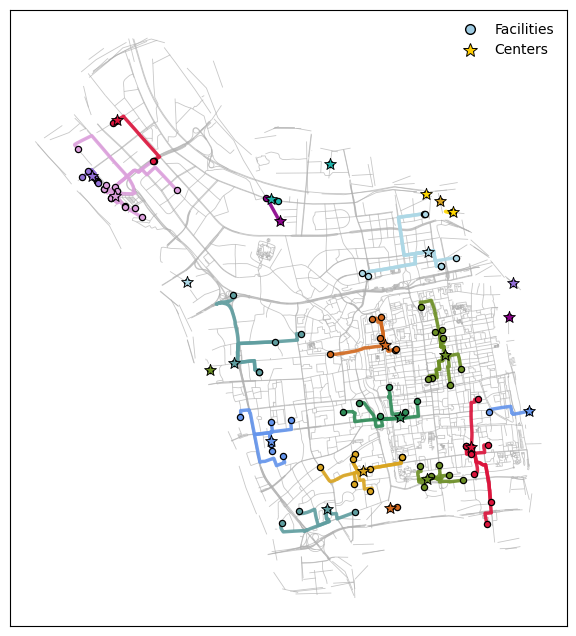

In [47]:
%matplotlib inline
roads_gdf = read_clean_roads(roads_path, assumed_crs="EPSG:4326")  # 若路网缺CRS且是WGS84
my_colors = [
    '#D2691E', '#5F9EA0', '#DC143C', '#6495ED', '#6B8E23','#8B008B',  # 5 个主色
    '#FFD700', '#DAA520', '#ADD8E6', '#20B2AA', '#9370D8', '#6B8E23', '#DDA0DD', '#2E8B57'  # 备用
]
fig, ax = plot_assign_paths(
    points_np=np.array(snapped_nodes),  # 或者用投影后的点
    centers=medians,
    assigns=assigns,
    paths_geom=paths_geom,
    roads_gdf=roads_gdf,
    title="pMedian with network distances",
    colors=my_colors,
    color_demands_by_center=True  # True: 不同center的需求点也跟随着色
)

In [48]:
# 保存上一单元返回的图为 300 dpi
import matplotlib.pyplot as plt
fig.savefig("pMedian_suzhou_paths.png", dpi=300, bbox_inches="tight")
plt.show()
